In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score
import seaborn as sns

#Load Dataset

In [22]:
df=sns.load_dataset("iris")

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.shape

(150, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
x=df.values[:,0:4] 
y=df.values[:,4] #class 

#Splitting the dataset for testing and training


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100) 

#Calling the Decision tree classifier

In [30]:
dt=DecisionTreeClassifier(criterion="entropy")

In [31]:
dt.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
y_pred=dt.predict(x_test)

In [33]:
print("Print accuracy of model:{0:.2f}".format(accuracy_score(y_test,y_pred)*100),"%")

Print accuracy of model:95.56 %


In [34]:
feature=df.columns[:4]
feature

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

#Visualizing the Decision tree

In [35]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

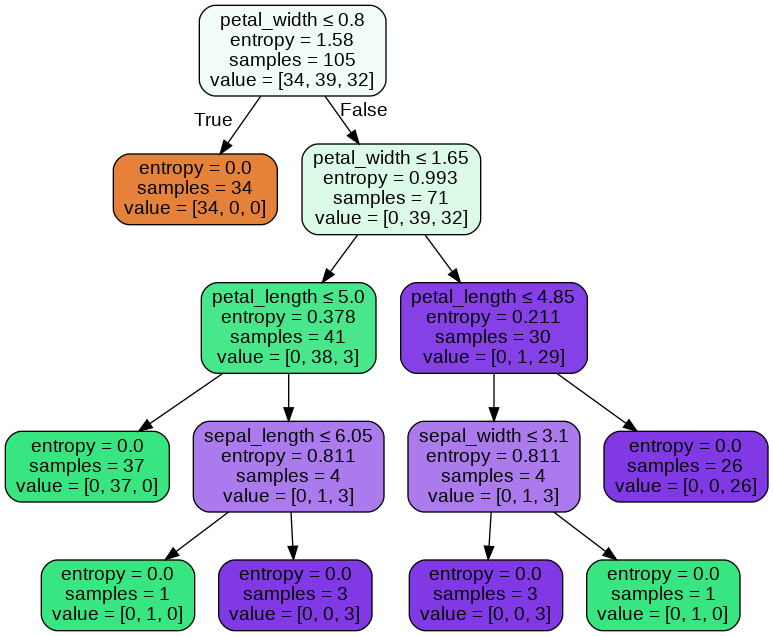

In [36]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =feature)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vis.png')
Image(graph.create_png())